# Importing the Data

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")


[*********************100%%**********************]  1 of 1 completed


In [2]:
Bin_Yearly = nifty50_data['Adj Close'].pct_change(periods=252) * 100
Bin50_Day = nifty50_data['Adj Close'].rolling(window=50).mean()
Bin200_Day = nifty50_data['Adj Close'].rolling(window=200).mean()

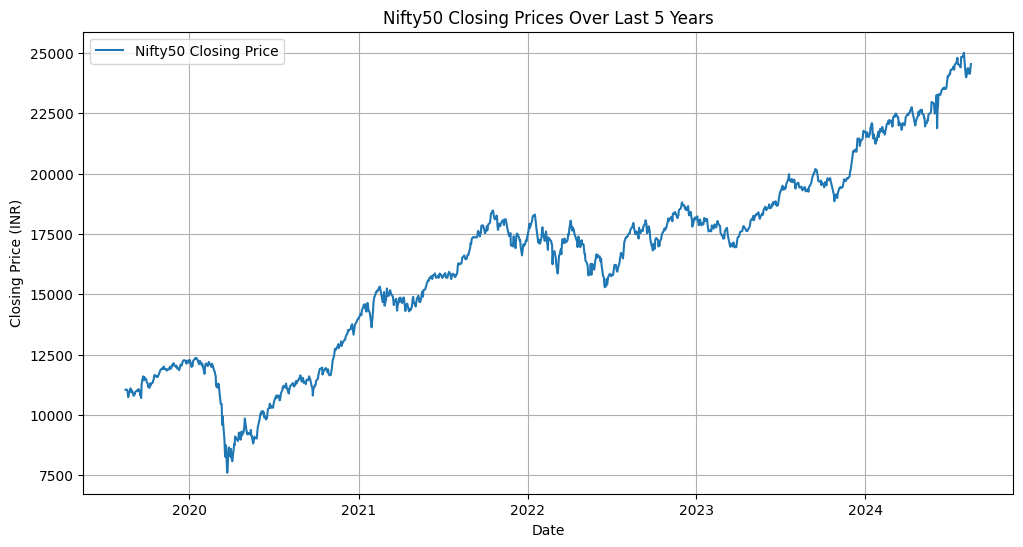

In [3]:
# Perform a simple analysis - plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
plt.title('Nifty50 Closing Prices Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# # Moving Average Graph
# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
# plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
# plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [5]:
# # Yearly Returns Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
# plt.title('Nifty50 Yearly Returns Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Yearly Return (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

## Cleaning and Pre processing

In [6]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits', 'Close'])


In [7]:
nifty50_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
nifty50_data.drop(columns=['Close'], inplace=True)

In [9]:
# nifty50_data = nifty50_data.drop(columns=['50-Day MA', '200-Day MA', 'Yearly Return'])

# nifty50_data.fillna({
#     '50-Day MA': nifty50_data['50-Day MA'].median(),
#     '200-Day MA': nifty50_data['200-Day MA'].median(),
#     'Yearly Return': nifty50_data['Yearly Return'].median()
# }, inplace=True)


Creating 3 bins, 50-Day Average, 200-Day Average, Yearly-Average

In [10]:
Bin50_Day.fillna(Bin50_Day.mode()[0], inplace=True)
Bin200_Day.fillna(Bin200_Day.mode()[0], inplace=True)
Bin_Yearly.fillna(Bin_Yearly.mode()[0], inplace=True)

In [11]:
def showIndexGraphs():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
    
    # Plotting the Histogram
    axes[0].plot(Bin50_Day, label='50-Day MA', color='orange')
    axes[0].plot(Bin200_Day, label='200-Day MA', color='blue')
    axes[0].set_title('20-Day & 50-DayMoving Average Trend Line')
    axes[0].set_ylabel('Year')
    axes[0].set_xlabel('Value')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(Bin_Yearly)
    axes[1].set_title('Yearly Returns Trend Line')
    axes[0].set_xlabel('Year')
    axes[1].set_ylabel('Returns %')
    axes[1].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


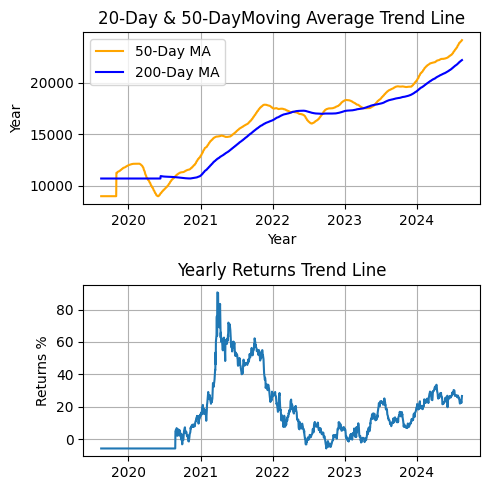

In [12]:
showIndexGraphs()

In [13]:
nifty50_data.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2019-08-16,11043.650391,11068.650391,10924.299805,11047.799805,470900
2019-08-19,11094.799805,11146.900391,11037.849609,11053.900391,369500
2019-08-20,11063.900391,11076.299805,10985.299805,11017.000000,444700
2019-08-21,11018.150391,11034.200195,10906.650391,10918.700195,557900
2019-08-22,10905.299805,10908.250000,10718.299805,10741.349609,668200


Normalizing the Dataset

In [14]:
import numpy as np

nifty_open_scaled = (nifty50_data['Open'] - np.min(nifty50_data['Open'])) / (np.max(nifty50_data['Open']) - np.min(nifty50_data['Open']))
nifty_adjclose_scaled = (nifty50_data['Adj Close'] - np.min(nifty50_data['Adj Close'])) / (np.max(nifty50_data['Adj Close']) - np.min(nifty50_data['Adj Close']))
nifty_high_scaled = (nifty50_data['High'] - np.min(nifty50_data['High'])) / (np.max(nifty50_data['High']) - np.min(nifty50_data['High']))
nifty_low_scaled = (nifty50_data['Low'] - np.min(nifty50_data['Low'])) / (np.max(nifty50_data['Low']) - np.min(nifty50_data['Low']))
nifty_volume_scaled = (nifty50_data['Volume'] - np.min(nifty50_data['Volume'])) / (np.max(nifty50_data['Volume']) - np.min(nifty50_data['Volume']))


In [15]:
nifty50_data_df = pd.DataFrame({'open_scaled': nifty_open_scaled, 'high_scaled': nifty_high_scaled, 
                            'adj_close_scaled': nifty_adjclose_scaled, 'low_scaled': nifty_low_scaled,
                              'volume_scaled': nifty_volume_scaled})

In [16]:
nifty50_data_df

,open_scaled,high_scaled,adj_close_scaled,low_scaled,volume_scaled
Date,,,,,
2019-08-16,0.191289,0.177903,0.197553,0.195652,0.260022
2019-08-19,0.194247,0.182494,0.197904,0.202160,0.204031
2019-08-20,0.192460,0.178351,0.195783,0.199148,0.245555
2019-08-21,0.189815,0.175881,0.190134,0.194640,0.308062
2019-08-22,0.183290,0.168490,0.179942,0.183843,0.368967
...,...,...,...,...,...
2024-08-09,0.962760,0.961356,0.963024,0.963016,0.118774
2024-08-12,0.958898,0.964469,0.961846,0.957335,0.154555
2024-08-13,0.960187,0.957847,0.949893,0.951855,0.132358


Here, first, predict the close price in coming 5 years, if it is successful, then moving on to 50-day average, 200-day average, then moving integrating it into a website, then it should store our data in postgres

Building DNN Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

2024-08-18 21:59:59.471197: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [19]:
def bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [20]:
from sklearn.model_selection import train_test_split

X = nifty50_data_df.drop(columns=['adj_close_scaled'])
y = nifty50_data_df['adj_close_scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
df = pd.DataFrame(nifty50_data_df)

# Build and train the model
input_shape = (X_train.shape[1], 1)
model = bilstm_model(input_shape)
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Save the model
model.save('bilstm_model.keras')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0155
Epoch 2/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.8017e-04
Epoch 3/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.4769e-04
Epoch 4/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.3564e-04
Epoch 5/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.6099e-04
Epoch 6/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.7907e-04
Epoch 7/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 3.4690e-04
Epoch 8/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.9121e-04
Epoch 9/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 2.3276e-04
Epoch 10/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.8064e-04
Epoch 11/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 2.7609e-04
Epoch 12/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.2348e-04
Epoch 13/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.2104e-04
Epoch 14/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 6.3556e-04
Epo

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((863, 4), (370, 4), (863,), (370,))

In [36]:
from sklearn.metrics import accuracy_score
y_pred = model.fit(X_train, y_train)
y_pred


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3557e-05


In [23]:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

import joblib
import datetime

model = load_model('bilstm_model.keras')

df = pd.DataFrame(nifty50_data_df)

# Create input data for prediction
def create_input(data, time_step=1):
    X = []
    X.append(data[len(data)-time_step:, 0])
    return np.array(X)

# Predict future prices
def predict_future_prices(model, data, future_days=365*5):
    time_step = 100
    predictions = []
    
    for _ in range(future_days):
        X = create_input(data, time_step)
        X = X.reshape(1, time_step, 1)
        pred = model.predict(X)
        predictions.append(pred[0, 0])
        
        # Update data with new prediction
        data = np.append(data, pred, axis=0)
    
    # Inverse transform predictions
    predictions = np.array(predictions).reshape(-1, 1)
    # predictions = scaler.inverse_transform(predictions)
    
    return predictions

# Preprocess data
# scaled_data = preprocess_data(df)

# Predict future prices for the next 5 years
future_days = 365 * 5  # Number of days to predict
predictions = predict_future_prices(model, df, future_days)

# Create a DataFrame for the predicted prices
last_date = pd.to_datetime(df['Date'].values[-1])
prediction_dates = [last_date + datetime.timedelta(days=i+1) for i in range(future_days)]
predicted_df = pd.DataFrame(data={'Date': prediction_dates, 'Predicted_Close': predictions.flatten()})

# Save predictions to a CSV file
predicted_df.to_csv('predicted_prices.csv', index=False)

print("Predictions saved to 'predicted_prices.csv'")
